#Jefferson Junior Flintz Galvão Ramirez    NUSP 10416785
#Eric Vinicius Lessa                  NUSP 10772870

In [ ]:
# Installing packages
! pip install kaggle
! pip install scikeras
! pip install lightgbm

In [ ]:
# Importing libraries

# Core libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Scikit-Learn wrappers for Keras
from scikeras.wrappers import KerasClassifier, KerasRegressor

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras import Sequential, layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Activation, Dense, Dropout, Input
from keras.optimizers import SGD

# SciKit-Learn utilities
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import lightgbm as lgb

In [ ]:
# Check whether the specified path exists or not
if os.path.exists("/content/telco.csv") == False :
  ! kaggle datasets download alfathterry/telco-customer-churn-11-1-3
  ! unzip telco-customer-churn-11-1-3.zip

In [ ]:
df = pd.read_csv('/content/telco.csv', na_values=["", "NA", "NaN"], keep_default_na=False)

df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


Exploração dos Dados

In [ ]:
pd.set_option('display.max_columns', None)

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


Algumas variáveis são removidas por serem duplicadas (Ex: Idade, Menos de 30 anos e mais de 60 anos)

In [ ]:
#Retirando variáveis indesejadas

df_dropped = df.drop(['Customer ID', 'Under 30','Senior Citizen','Dependents','Country','State','City','Zip Code','Latitude','Longitude','Population','Quarter','Referred a Friend','Internet Service','Churn Category','Churn Reason','Churn Score','Satisfaction Score','Customer Status'], axis=1)
df_dropped.head()


,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Label,CLTV
0,Male,78,No,0,0,1,None,No,0.00,No,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,Yes,5433
1,Female,74,Yes,1,1,8,Offer E,Yes,48.85,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,Yes,5302
2,Male,71,No,3,0,18,Offer D,Yes,11.33,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,Yes,3179
3,Female,78,Yes,1,1,25,Offer C,Yes,19.76,No,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,Yes,5337
4,Female,80,Yes,1,1,37,Offer C,Yes,6.33,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,Yes,2793


Verificando se há dados faltantes

In [ ]:
nan_columns = df_dropped.columns[df_dropped.isnull().any()]
print(nan_columns)

Index([], dtype='object')


Atributos numéricos

In [ ]:
df_dropped.describe(include=[np.number])

numerical_features = df_dropped.select_dtypes(include=[np.number])
numerical_features.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,CLTV
0,78,0,0,1,0.00,8,39.65,39.65,0.00,20,0.00,59.65,5433
1,74,1,1,8,48.85,17,80.65,633.30,0.00,0,390.80,1024.10,5302
2,71,3,0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88,3179
3,78,1,1,25,19.76,12,98.50,2514.50,13.43,0,494.00,2995.07,5337
4,80,1,1,37,6.33,14,76.50,2868.15,0.00,0,234.21,3102.36,2793


In [ ]:
def show_boxplots(data, x_title, y_titles):
    cols = 3  # Number of columns in the visualization
    rows = (len(y_titles) + cols - 1) // cols  # Compute the number of rows
    plt.figure(figsize=(6 * cols, 4 * rows))  # Adjust figure size based on number of plots

    for i, y in enumerate(y_titles, start=1):
        plt.subplot(rows, cols, i)
        sns.boxplot(data=data, x=x_title, y=y)
        plt.xlabel(x_title, fontsize=12)
        plt.ylabel(y, fontsize=12)
        plt.title(f"{y} by {x_title}", fontsize=15)  # Generate dynamic title
        plt.tight_layout()
    plt.show()

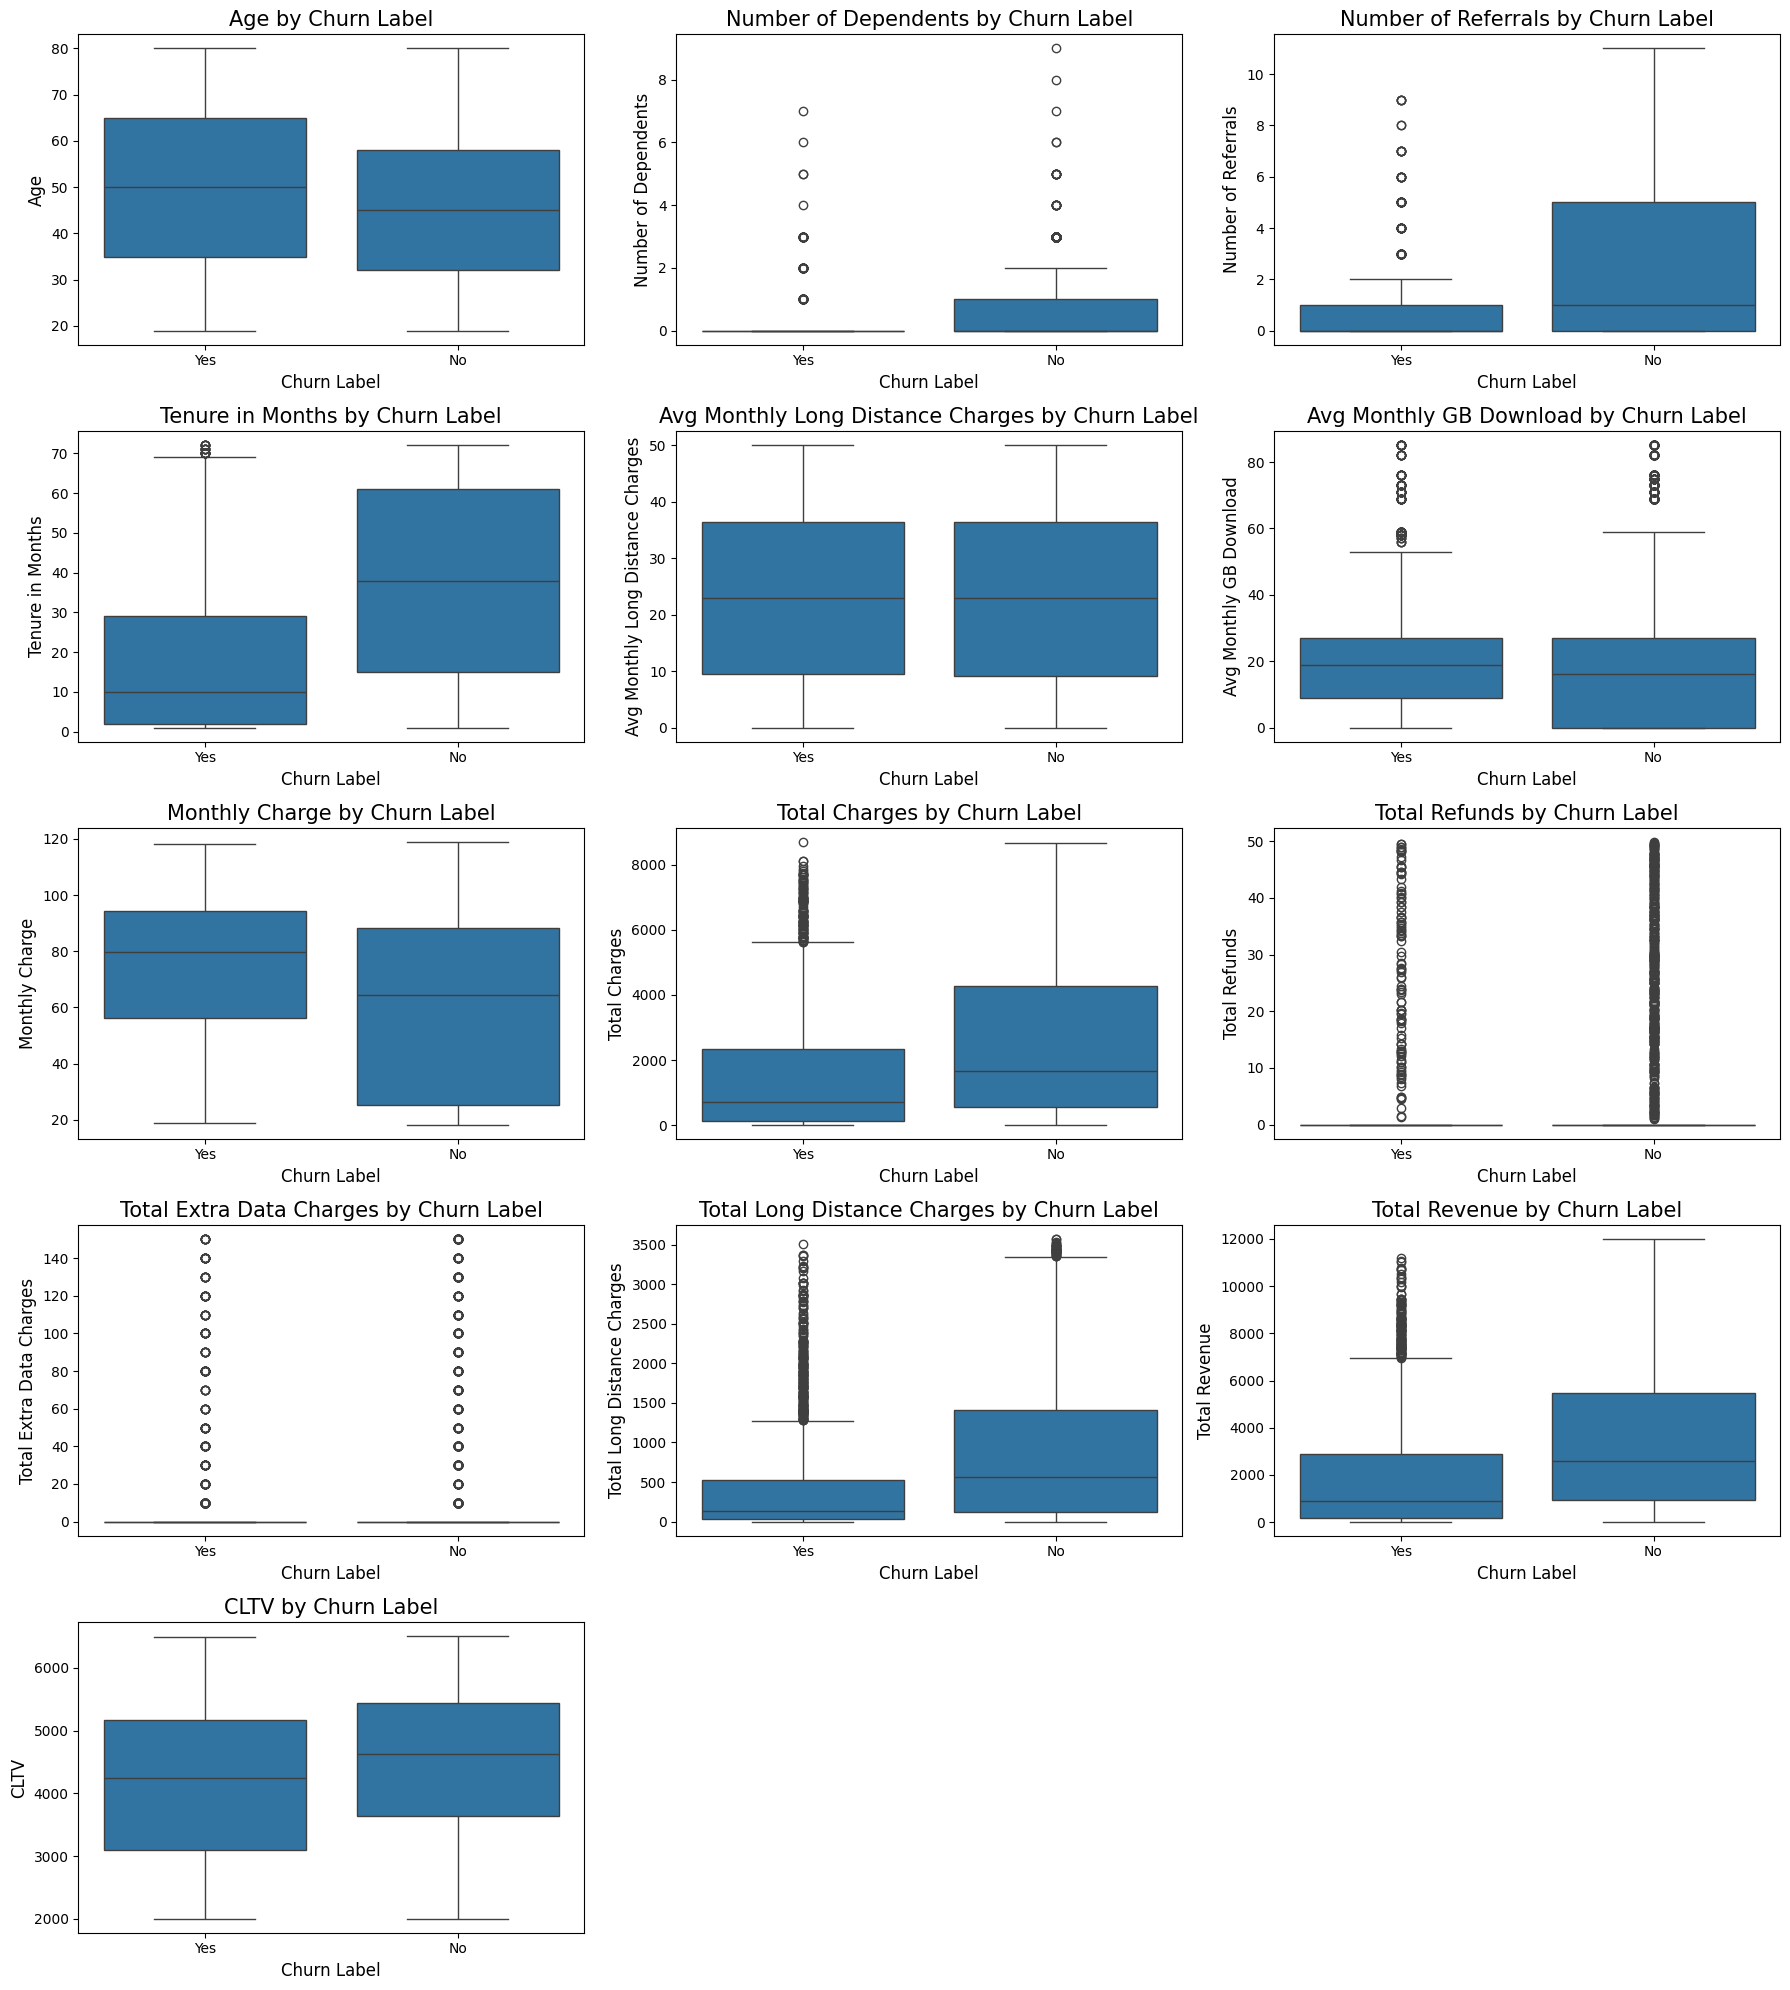

In [ ]:
x_titles = "Churn Label"
y_titles = numerical_features.columns.tolist()

show_boxplots(df_dropped, x_titles, y_titles)

<Axes: >

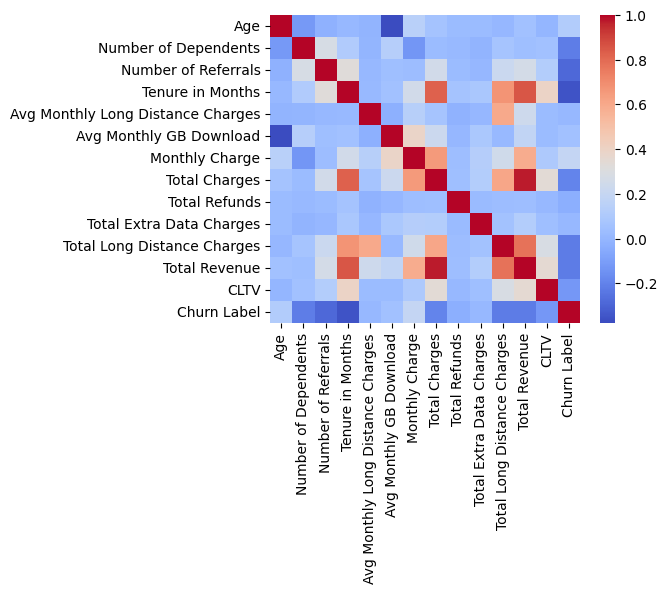

In [ ]:
df_encoded = numerical_features.copy()
df_encoded['Churn Label'] = df['Churn Label'].apply(lambda x: 1 if x == "Yes" else 0)

# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Create a heatmap
plt.subplots(figsize=(5,4))
sns.heatmap(corr_matrix, cmap="coolwarm")

In [ ]:
#Listando Variáveis Categóricas:

categorical_features = df_dropped.select_dtypes(exclude=[np.number])

categorical_columns = categorical_features.columns

categorical_features.head()

,Gender,Married,Offer,Phone Service,Multiple Lines,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Churn Label
0,Male,No,None,No,No,DSL,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,Yes
1,Female,Yes,Offer E,Yes,Yes,Fiber Optic,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,Yes
2,Male,No,Offer D,Yes,Yes,Fiber Optic,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,Yes
3,Female,Yes,Offer C,Yes,No,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Yes
4,Female,Yes,Offer C,Yes,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Yes


In [ ]:
x_titles = categorical_features.columns.tolist()
x_titles.remove("Churn Label")
hue_titles = "Churn Label"

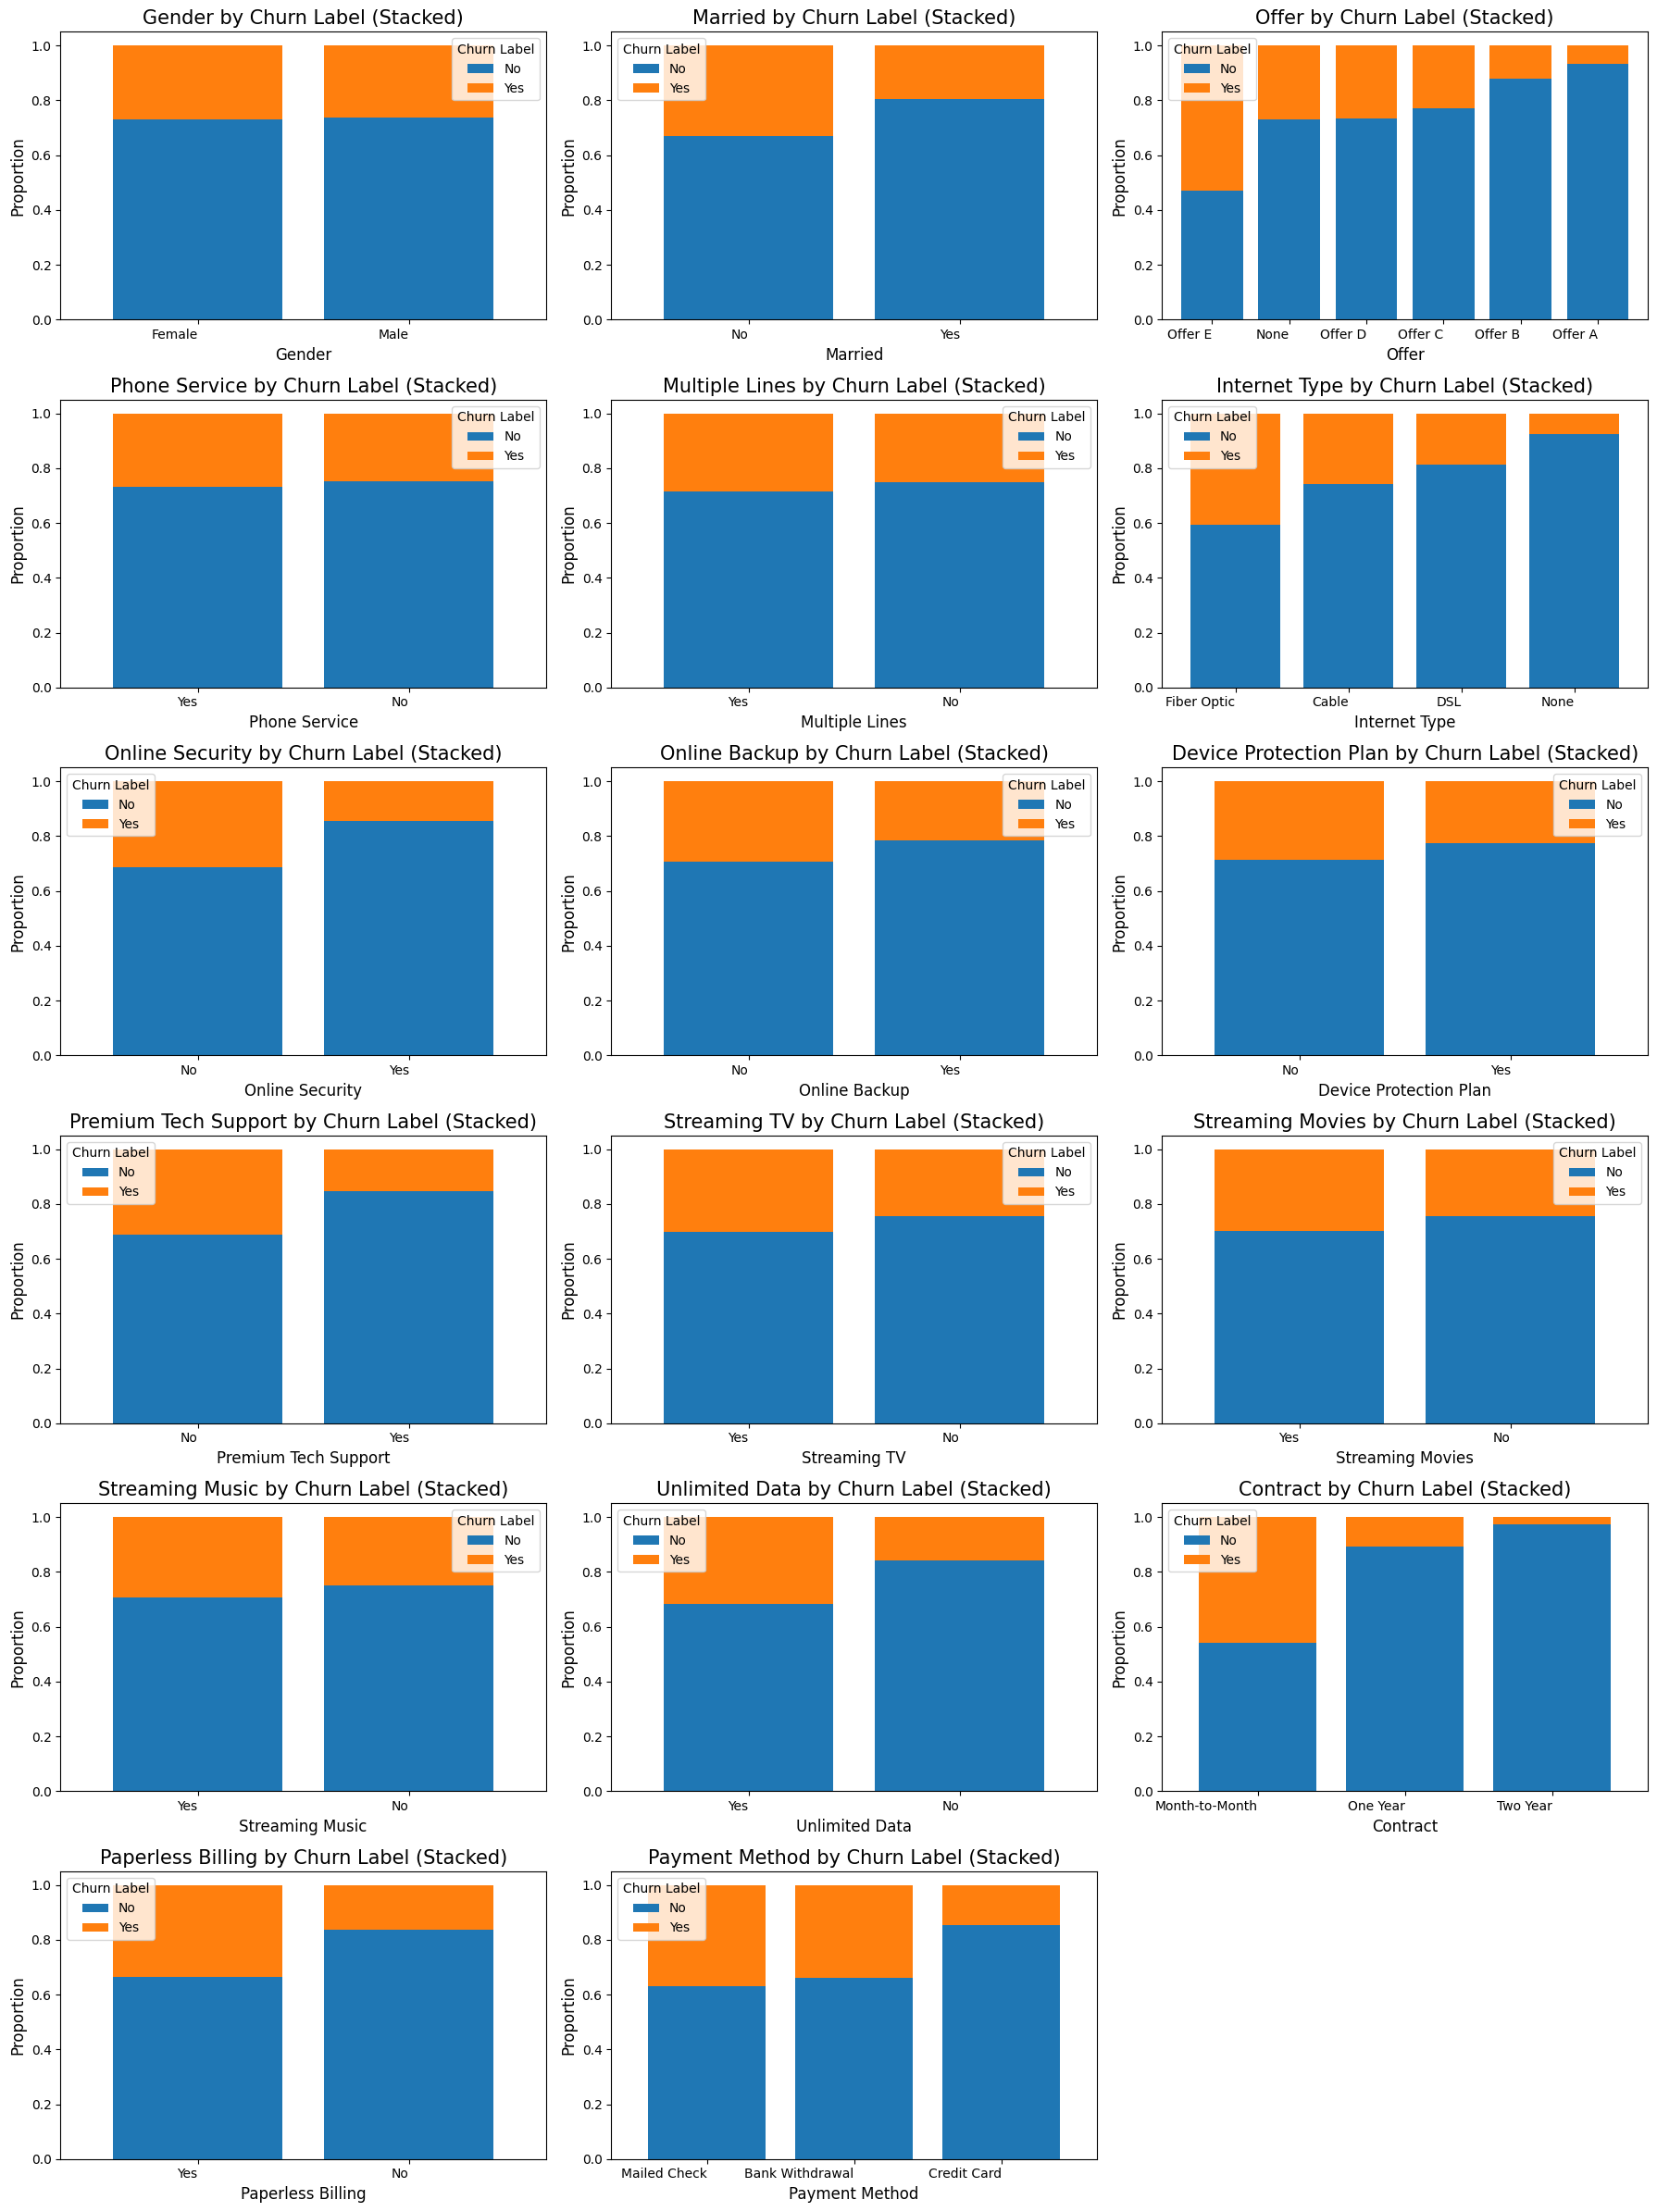

In [ ]:
def show_stacked_barplots(data, x_titles, hue_title):
    cols = 3  # Number of columns in the visualization
    rows = (len(x_titles) + cols - 1) // cols  # Compute the number of rows
    plt.figure(figsize=(6 * cols, 4 * rows))  # Adjust figure size based on number of plots

    for i, x in enumerate(x_titles, start=1):
        plt.subplot(rows, cols, i)

        # Calculate proportions
        proportions = data.groupby([x, hue_title]).size().unstack(fill_value=0)
        proportions["Churn Rate"] = proportions.apply(lambda row: row["Yes"] / row.sum(), axis=1)

        # Sort categories by churn rate in descending order
        proportions = proportions.sort_values(by="Churn Rate", ascending=False).drop(columns=["Churn Rate"])

        # Normalize proportions for stacked bar
        proportions = proportions.div(proportions.sum(axis=1), axis=0)

        # Plot stacked bars
        proportions.plot(kind="bar", stacked=True, ax=plt.gca(), width=0.8)

        # Fix x-axis labels
        plt.gca().set_xticklabels(proportions.index, rotation=0, ha="right")

        plt.xlabel(x, fontsize=12)
        plt.ylabel("Proportion", fontsize=12)
        plt.title(f"{x} by {hue_title} (Stacked)", fontsize=15)
        plt.legend(title=hue_title, fontsize=10)
        plt.tight_layout()

    plt.show()

show_stacked_barplots(df_dropped, x_titles, hue_titles)

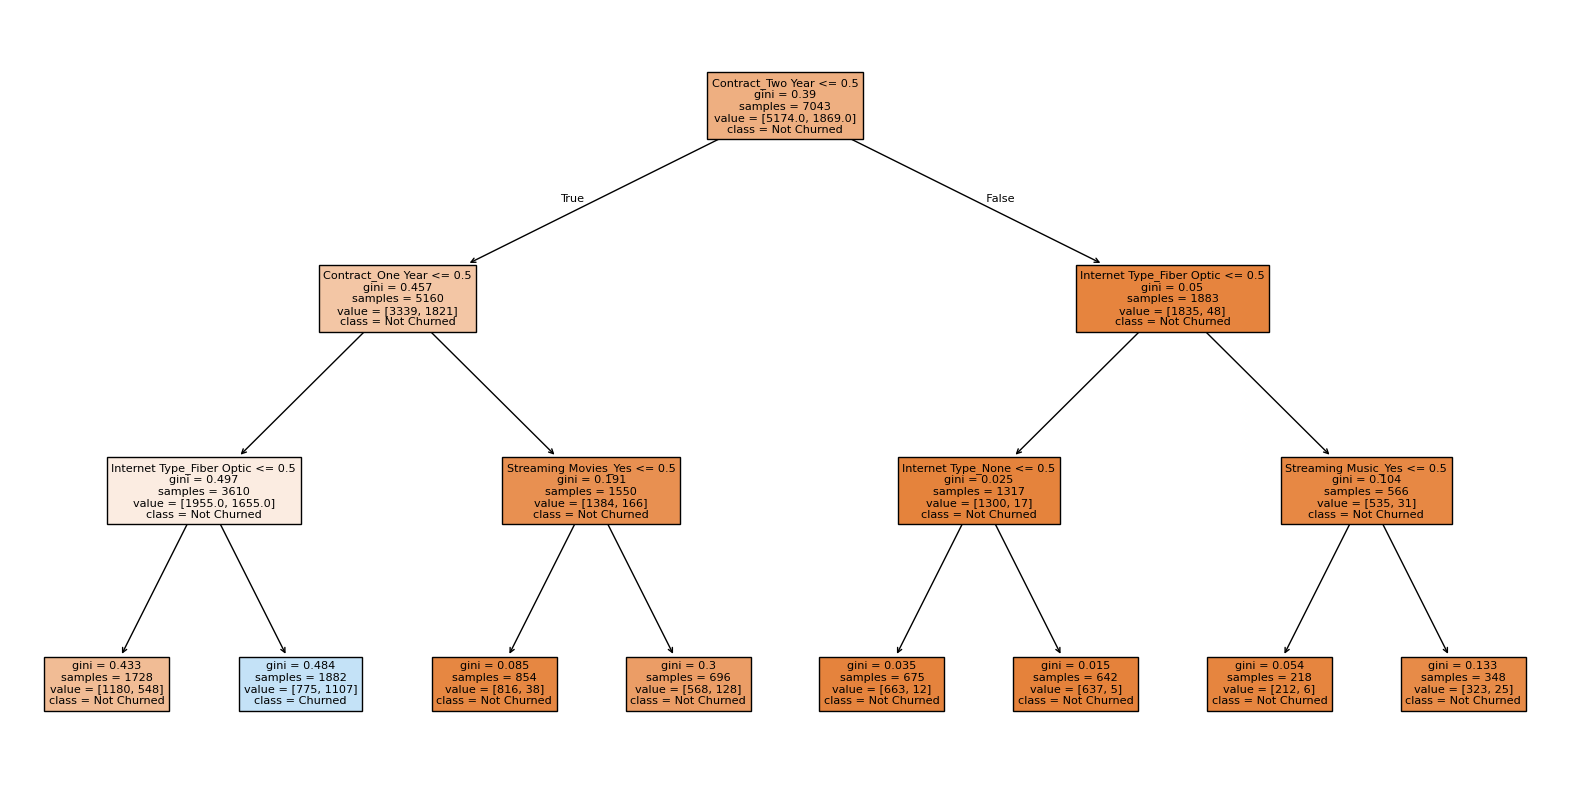

In [ ]:
clf = DecisionTreeClassifier(max_depth=3)
X = pd.get_dummies(categorical_features.drop(columns=['Churn Label']), drop_first=True)
y = df['Churn Label'].apply(lambda x: 1 if x == "Yes" else 0)
clf.fit(X, y)

plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=["Not Churned", "Churned"], filled=True)
plt.show()

Pré-Processamento dos dados

In [ ]:
# Identify binary features with exactly two unique values

binary_features = [col for col in df_dropped.columns if df_dropped[col].nunique() == 2]

# Define a mapping dictionary for common binary values
# Default: 1 for "Yes"/"Male" and 0 for "No"/"Female", can be expanded as needed
mapping_dict = {
    "Yes": 1,
    "No": 0,
    "Male": 1,
    "Female": 0
}

# Map binary features using the mapping dictionary
df_dropped[binary_features] = df_dropped[binary_features].applymap(lambda x: mapping_dict.get(x, x))

df_dropped.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Label,CLTV
0,1,78,0,0,0,1,None,0,0.00,0,DSL,8,0,0,1,0,0,1,0,0,Month-to-Month,1,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,1,5433
1,0,74,1,1,1,8,Offer E,1,48.85,1,Fiber Optic,17,0,1,0,0,0,0,0,1,Month-to-Month,1,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,1,5302
2,1,71,0,3,0,18,Offer D,1,11.33,1,Fiber Optic,52,0,0,0,0,1,1,1,1,Month-to-Month,1,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,1,3179
3,0,78,1,1,1,25,Offer C,1,19.76,0,Fiber Optic,12,0,1,1,0,1,1,0,1,Month-to-Month,1,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,1,5337
4,0,80,1,1,1,37,Offer C,1,6.33,1,Fiber Optic,14,0,0,0,0,0,0,0,1,Month-to-Month,1,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,1,2793


In [ ]:
#Codificando as Outras Variáveis Categóricas:

columns_to_encode = ['Gender', 'Offer', 'Internet Type', 'Contract', 'Payment Method']

df_dropped = pd.get_dummies(df_dropped, columns=columns_to_encode, drop_first=True)


In [ ]:
df_dropped.head()

,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Label,CLTV,Gender_1,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_One Year,Contract_Two Year,Payment Method_Credit Card,Payment Method_Mailed Check
0,78,0,0,0,1,0,0.00,0,8,0,0,1,0,0,1,0,0,1,39.65,39.65,0.00,20,0.00,59.65,1,5433,True,False,False,False,False,False,True,False,False,False,False,False,False
1,74,1,1,1,8,1,48.85,1,17,0,1,0,0,0,0,0,1,1,80.65,633.30,0.00,0,390.80,1024.10,1,5302,False,False,False,False,False,True,False,True,False,False,False,True,False
2,71,0,3,0,18,1,11.33,1,52,0,0,0,0,1,1,1,1,1,95.45,1752.55,45.61,0,203.94,1910.88,1,3179,True,False,False,False,True,False,False,True,False,False,False,False,False
3,78,1,1,1,25,1,19.76,0,12,0,1,1,0,1,1,0,1,1,98.50,2514.50,13.43,0,494.00,2995.07,1,5337,False,False,False,True,False,False,False,True,False,False,False,False,False
4,80,1,1,1,37,1,6.33,1,14,0,0,0,0,0,0,0,1,1,76.50,2868.15,0.00,0,234.21,3102.36,1,2793,False,False,False,True,False,False,False,True,False,False,False,False,False


In [ ]:
#Normalização/Escalonamento dos Dados das variáveis numéricas:

# Selecionar apenas as variáveis numéricas (excluindo a variável alvo)
numerical_cols = df_dropped.select_dtypes(include=['number']).columns.drop('Churn Label')

# Aplicar a padronização nas colunas numéricas
scaler = StandardScaler()
df_normalized = df_dropped.copy()  # Faz uma cópia do dataframe original
df_normalized[numerical_cols] = scaler.fit_transform(df_dropped[numerical_cols])

df_normalized['Churn Label'] = df_dropped['Churn Label']  # Manter os valores originais

df_normalized.head()

,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Label,CLTV,Gender_1,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_One Year,Contract_Two Year,Payment Method_Credit Card,Payment Method_Mailed Check
0,1.880110,-0.966622,-0.486835,-0.650409,-1.278988,-3.054010,-1.486303,-0.854176,-0.612975,-0.633933,-0.725563,1.381277,-0.639439,-0.790132,1.256171,-0.739062,-1.436955,0.829798,-0.834611,-0.988823,-0.248313,0.523411,-0.884833,-1.038299,1,0.872974,True,False,False,False,False,False,True,False,False,False,False,False,False
1,1.641292,1.034530,0.551874,-0.317185,-0.993743,0.327438,1.676120,1.170719,-0.172176,-0.633933,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,-0.739062,0.695916,0.829798,0.528063,-0.726848,-0.248313,-0.273300,-0.423221,-0.701668,1,0.762236,False,False,False,False,False,True,False,True,False,False,False,True,False
2,1.462179,-0.966622,2.629292,-0.650409,-0.586250,0.327438,-0.752828,1.170719,1.542040,-0.633933,-0.725563,-0.723968,-0.639439,1.265612,1.256171,1.353066,0.695916,0.829798,1.019955,-0.232929,5.523605,-0.273300,-0.643940,-0.392146,1,-1.032395,True,False,False,False,True,False,False,True,False,False,False,False,False
3,1.880110,1.034530,0.551874,-0.317185,-0.301005,0.327438,-0.207092,-0.854176,-0.417064,-0.633933,1.378241,1.381277,-0.639439,1.265612,1.256171,-0.739062,0.695916,0.829798,1.121324,0.103315,1.451245,-0.273300,-0.301322,-0.013720,1,0.791822,False,False,False,True,False,False,False,True,False,False,False,False,False
4,1.999519,1.034530,0.551874,-0.317185,0.187986,0.327438,-1.076516,1.170719,-0.319109,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,-0.739062,0.695916,0.829798,0.390134,0.259379,-0.248313,-0.273300,-0.608185,0.023728,1,-1.358692,False,False,False,True,False,False,False,True,False,False,False,False,False


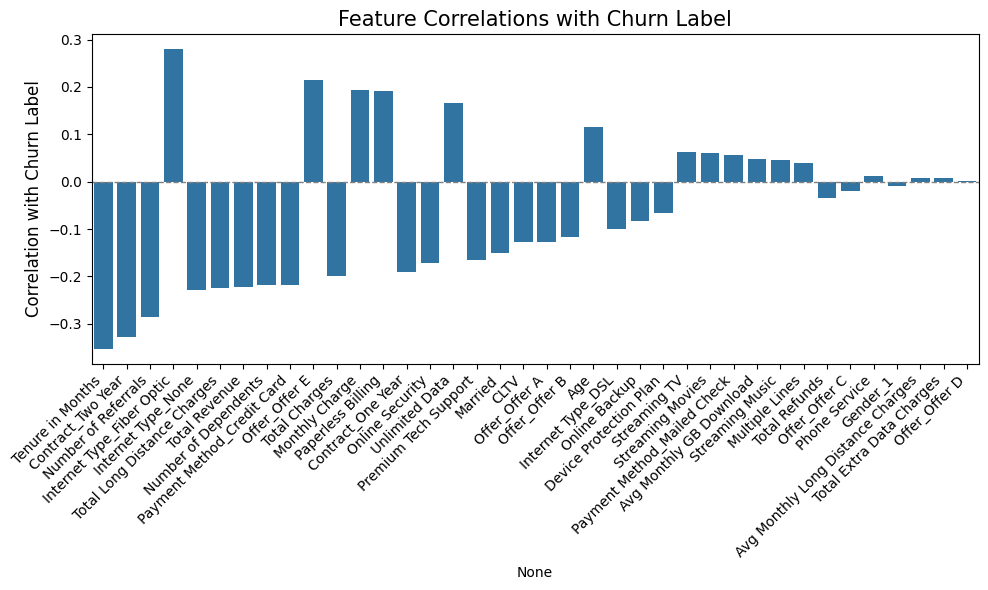

In [ ]:
df_encoded = df_normalized.copy()
df_encoded['Churn Label'] = df_dropped['Churn Label']

# Compute correlation of each feature with 'Churn Label'
correlations = df_encoded.corr()['Churn Label'].drop('Churn Label')  # Drop the target itself

# Sort correlations by absolute value in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.index, y=correlations[sorted_correlations.index])
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel("Correlation with Churn Label", fontsize=12)
plt.title("Feature Correlations with Churn Label", fontsize=15)
plt.tight_layout()
plt.show()

Preparação para Treinamento do Modelo

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste

# Definir a variável alvo
y = df_normalized['Churn Label']

# Definir as variáveis preditoras
X = df_normalized.drop(columns=['Churn Label'])

In [ ]:
#Divisão em Conjuntos de Treino e Teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Treinamento do Modelo (Rede Neural)

In [ ]:
input_dim = X_train.shape[1]
def create_model(optimizer='sgd', activation='relu', neurons_per_layer=[32, 16],
                 dropout_rate=0.0, input_dim=input_dim):
    if input_dim is None:
        raise ValueError("You must provide input_dim as an argument.")

    model = Sequential()
    # Add the input layer explicitly
    model.add(Input(shape=(input_dim,)))

    # Add layers dynamically based on the neurons_per_layer array
    for neurons in neurons_per_layer:
        # Hidden layers
        model.add(Dense(neurons, activation=activation))
        # Add dropout layer if dropout_rate > 0
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['recall'])
    return model

In [ ]:

param_grid = {
    'model__optimizer': ['sgd'],
    'model__activation': ['relu'],
    'model__neurons_per_layer': [
          [64],
          [64, 32],
          [64, 32, 16],
          [64, 32, 16, 8]
        ],  # Different architectures
    'model__dropout_rate': [0.5],  # Dropout rates to test
    'epochs': [500],  # Number of epochs to test
}

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=10,  # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore model weights from the best epoch
)

tf.random.set_seed(42)

model = KerasClassifier(build_fn=create_model, verbose=0, callbacks=[early_stopping], validation_split=0.2)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2, scoring='recall', cv=3)

In [ ]:
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_params = grid_search.best_params_

results = pd.DataFrame(grid_search.cv_results_)
print(best_params)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END epochs=500, model__activation=relu, model__dropout_rate=0.5, model__neurons_per_layer=[64], model__optimizer=sgd; total time=  54.8s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END epochs=500, model__activation=relu, model__dropout_rate=0.5, model__neurons_per_layer=[64], model__optimizer=sgd; total time= 1.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END epochs=500, model__activation=relu, model__dropout_rate=0.5, model__neurons_per_layer=[64], model__optimizer=sgd; total time= 1.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END epochs=500, model__activation=relu, model__dropout_rate=0.5, model__neurons_per_layer=[64, 32], model__optimizer=sgd; total time=  52.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END epochs=500, model__activation=relu, model__dropout_rate=0.5, model__neurons_per_layer=[64, 32], model__optimizer=sgd; total time= 1.0min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END epochs=500, model__activation=relu, model__dropout_rate=0.5, model__neurons_per_layer=[64, 32], model__optimizer=sgd; total time=  59.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END epochs=500, model__activation=relu, model__dropout_rate=0.5, model__neurons_per_layer=[64, 32, 16], model__optimizer=sgd; total time=  51.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END epochs=500, model__activation=relu, model__dropout_rate=0.5, model__neurons_per_layer=[64, 32, 16], model__optimizer=sgd; total time= 1.1min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END epochs=500, model__activation=relu, model__dropout_rate=0.5, model__neurons_per_layer=[64, 32, 16], model__optimizer=sgd; total time= 1.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END epochs=500, model__activation=relu, model__dropout_rate=0.5, model__neurons_per_layer=[64, 32, 16, 8], model__optimizer=sgd; total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END epochs=500, model__activation=relu, model__dropout_rate=0.5, model__neurons_per_layer=[64, 32, 16, 8], model__optimizer=sgd; total time=  44.2s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END epochs=500, model__activation=relu, model__dropout_rate=0.5, model__neurons_per_layer=[64, 32, 16, 8], model__optimizer=sgd; total time= 1.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


{'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons_per_layer': [64, 32, 16], 'model__optimizer': 'sgd'}


In [ ]:
# Select relevant columns for display
columns_to_show = [
    "params",
    "mean_test_score",
    "std_test_score",
    "rank_test_score"
]

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

print("Grid Search Results:")
print(results[columns_to_show].sort_values(by="rank_test_score"))

Grid Search Results:
                                                                                                                                             params  mean_test_score  std_test_score  rank_test_score
2     {'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons_per_layer': [64, 32, 16], 'model__optimizer': 'sgd'}         0.664403        0.006443                1
1         {'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons_per_layer': [64, 32], 'model__optimizer': 'sgd'}         0.638533        0.007065                2
0             {'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons_per_layer': [64], 'model__optimizer': 'sgd'}         0.623549        0.009338                3
3  {'epochs': 500, 'model__activation': 'relu', 'model__dropout_rate': 0.5, 'model__neurons_per_layer': [64, 32, 16, 8], 'model__optimizer': 'sgd'}         0.425614        0.301169       

In [ ]:
# Construção do modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # Primeira camada oculta
model.add(Dropout(0.5))  # Dropout para evitar overfitting
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))  # Primeira camada oculta
model.add(Dropout(0.5))  # Dropout para evitar overfitting
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))  # Primeira camada oculta
model.add(Dropout(0.5))  # Dropout para evitar overfitting
model.add(Dense(1, activation='sigmoid'))  # Camada de saída para classificação binária

# Compilação do modelo
sgd = SGD(learning_rate=0.01)  # Taxa de aprendizado menor para treinamento mais estável
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['recall'])

# Treinamento do modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.6499 - recall: 0.3130 - val_loss: 0.5704 - val_recall: 0.0000e+00
Epoch 2/500
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6014 - recall: 0.0637 - val_loss: 0.5549 - val_recall: 0.0000e+00
Epoch 3/500
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5709 - recall: 0.0286 - val_loss: 0.5388 - val_recall: 0.0000e+00
Epoch 4/500
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5569 - recall: 0.0160 - val_loss: 0.5288 - val_recall: 0.0000e+00
Epoch 5/500
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5440 - recall: 0.0108 - val_loss: 0.5201 - val_recall: 0.0000e+00
Epoch 6/500
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5406 - recall: 0.0038 - val_loss: 0.5112 - val_recall: 0.0000e+00
Epoch 7/500
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5391 - recall: 0.0117 - val_loss: 0.5047 - val_recall: 0.0000e+00
Epoch 8/500
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.5240 - recall: 0.0122 - val_loss:

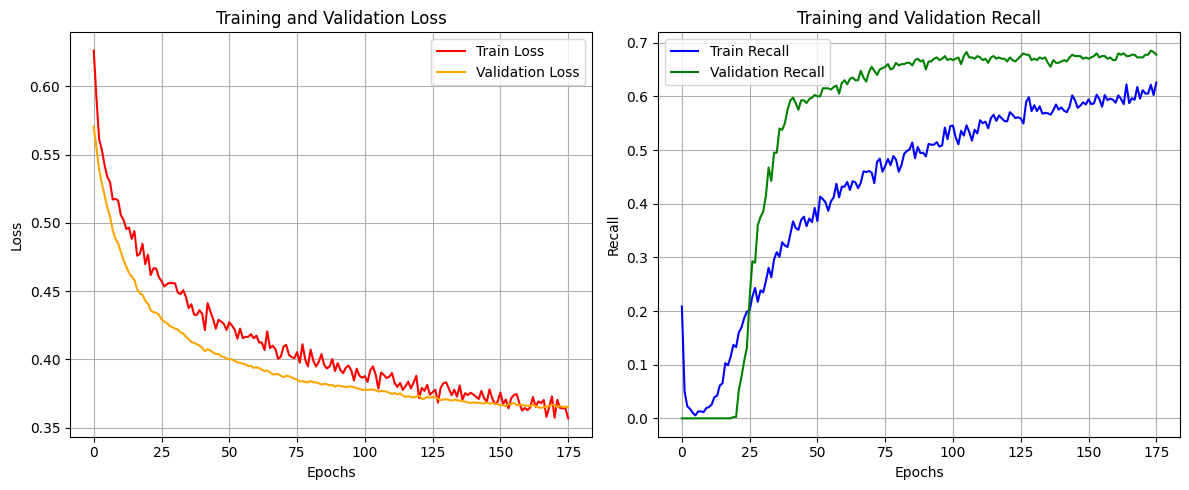

In [ ]:
def train_and_plot(model, X_train, y_train, X_test, y_test, epochs, batch_size):
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Plot results after training completes
    plt.figure(figsize=(12, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)

    # Recall Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['recall'], label='Train Recall', color='blue')
    plt.plot(history.history['val_recall'], label='Validation Recall', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.title('Training and Validation Recall')
    plt.legend()
    plt.grid(True)

    # Display the plots
    plt.tight_layout()
    plt.show()

# Example usage:
train_and_plot(model, X_train, y_train, X_test, y_test, epochs=500, batch_size=32)

In [ ]:
class CustomKerasClassifier:
    def __init__(self, model, threshold=0.5):
        self.model = model
        self.threshold = threshold

    def predict(self, X, verbose=0):  # Default verbose to 0
        return (self.model.predict(X, verbose=verbose) > self.threshold).astype("int32")

    def predict_proba(self, X, verbose=0):  # Default verbose to 0
        return self.model.predict(X, verbose=verbose)

    def fit(self, X, y, *args, **kwargs):
        return self.model.fit(X, y, *args, **kwargs)

    def evaluate(self, X, y, *args, **kwargs):
        return self.model.evaluate(X, y, *args, **kwargs)

    def set_threshold(self, threshold):
        self.threshold = threshold

In [ ]:
discrete_model = CustomKerasClassifier(model)

ann_predictions = discrete_model.predict(X_test)

print(classification_report(y_test, ann_predictions, target_names=["Not Churned", "Churned"]))

              precision    recall  f1-score   support

 Not Churned       0.87      0.89      0.88      1009
     Churned       0.72      0.68      0.69       400

    accuracy                           0.83      1409
   macro avg       0.80      0.78      0.79      1409
weighted avg       0.83      0.83      0.83      1409



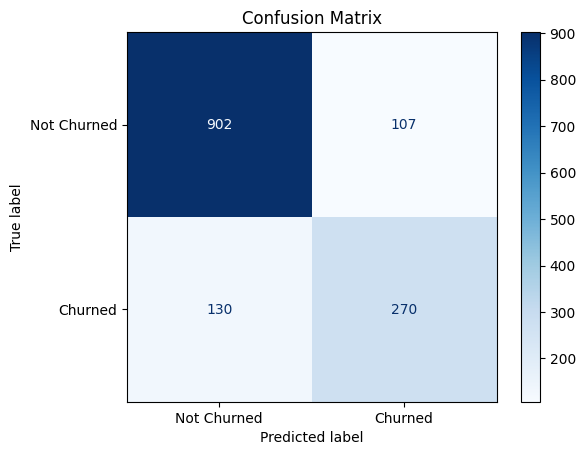

In [ ]:
cm = confusion_matrix(y_test, ann_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churned", "Churned"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


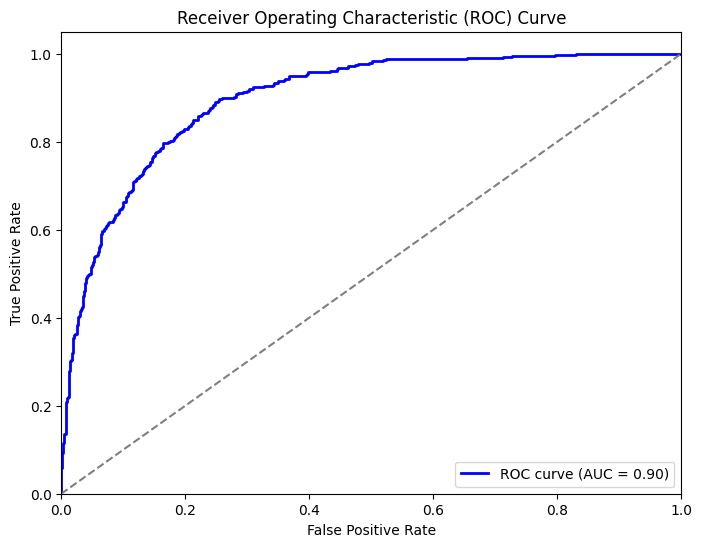

Best Threshold based on Youden's index: 0.22886134684085846


In [ ]:
def plot_roc_curve(model, X_test, y_test):
    # Predict probabilities for the test set
    y_prob = model.predict(X_test)

    # Compute ROC curve and ROC area for different threshold values
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Compute the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Choose the best threshold based on maximizing the Youden's index (tpr - fpr)
    youden_index = tpr - fpr
    best_threshold_index = np.argmax(youden_index)
    best_threshold = thresholds[best_threshold_index]

    print(f'Best Threshold based on Youden\'s index: {best_threshold}')
    return best_threshold

# Example usage with your trained model
best_threshold = plot_roc_curve(model, X_test, y_test)

              precision    recall  f1-score   support

 Not Churned       0.95      0.75      0.83      1009
     Churned       0.58      0.90      0.71       400

    accuracy                           0.79      1409
   macro avg       0.77      0.82      0.77      1409
weighted avg       0.84      0.79      0.80      1409



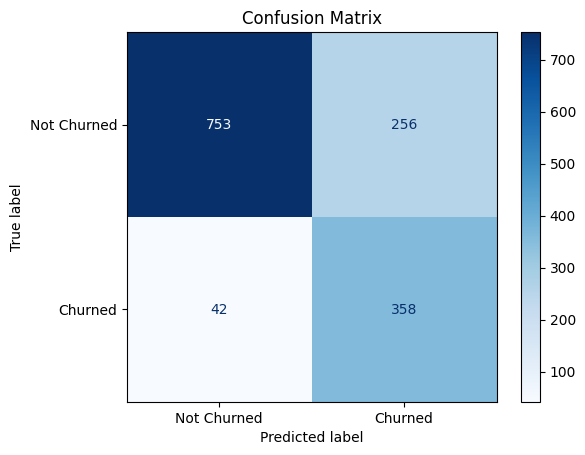

In [ ]:
discrete_model = CustomKerasClassifier(model, threshold=best_threshold)

ann_predictions = discrete_model.predict(X_test)

print(classification_report(y_test, ann_predictions, target_names=["Not Churned", "Churned"]))

cm = confusion_matrix(y_test, ann_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churned", "Churned"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

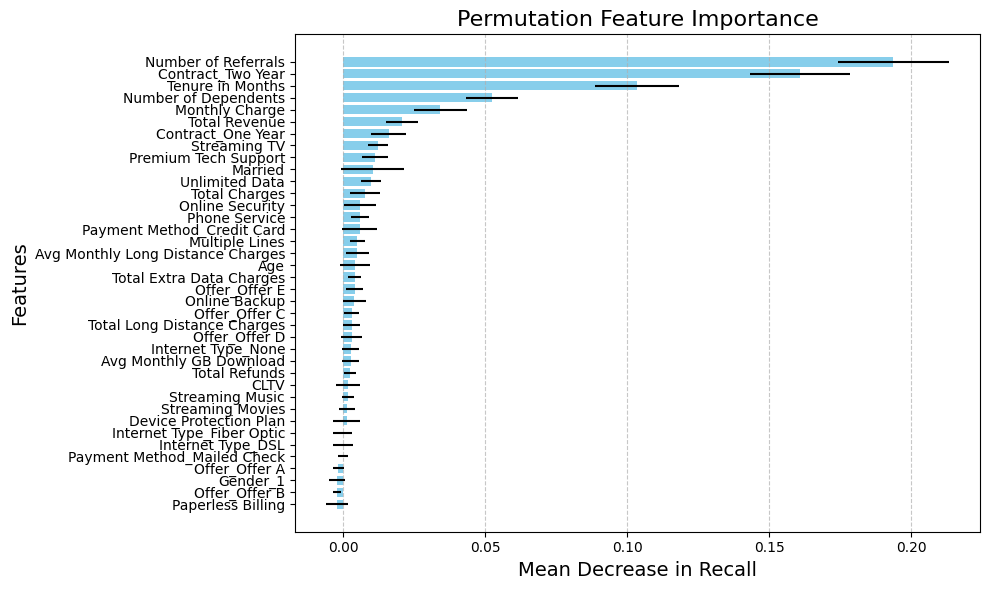

In [ ]:
def plot_permutation_importance(model, X, y, feature_names, n_repeats=30, random_state=42):
    # Compute permutation feature importance
    perm_importance = permutation_importance(
        model,
        X,
        y,
        n_repeats=n_repeats,
        random_state=random_state,
        scoring="recall",
    )

    # Sort features by importance
    sorted_idx = perm_importance.importances_mean.argsort()[::-1]
    sorted_importances = perm_importance.importances_mean[sorted_idx]
    sorted_features = np.array(feature_names)[sorted_idx]
    sorted_std = perm_importance.importances_std[sorted_idx]

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_importances, xerr=sorted_std, color='skyblue')
    plt.xlabel("Mean Decrease in Recall", fontsize=14)
    plt.ylabel("Features", fontsize=14)
    plt.title("Permutation Feature Importance", fontsize=16)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_permutation_importance(discrete_model, X_test, y_test, feature_names=X.columns)

In [ ]:
# model definition
knn = KNeighborsClassifier()

# Define the hyperparameters to tune (including n_neighbors)
param_grid = {
    'n_neighbors': np.arange(1, 30, 1)
}

# Initialize GridSearchCV
knn_grid_cv = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='recall', cv=3)

In [ ]:
# Fit the GridSearchCV to the data
knn_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='recall')

In [ ]:
# Print the results
knn_predictions = knn_grid_cv.predict(X_test)
best_n_neighbors = knn_grid_cv.best_params_['n_neighbors']
print("Best number of neighbors:", best_n_neighbors)
print(classification_report(y_test, knn_predictions, target_names=["Not Churned", "Churned"]))

Best number of neighbors: 25
              precision    recall  f1-score   support

 Not Churned       0.85      0.86      0.86      1009
     Churned       0.64      0.61      0.63       400

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409



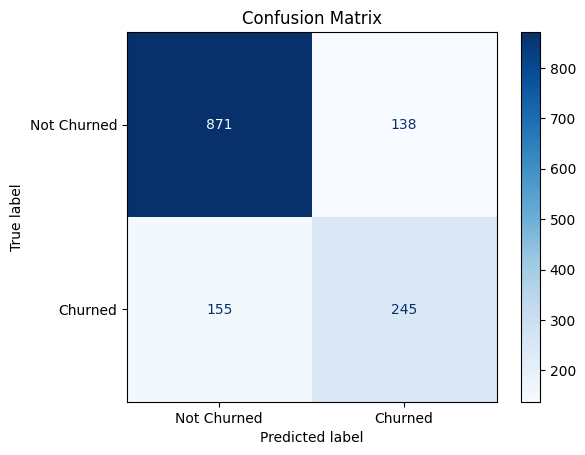

In [ ]:
cm = confusion_matrix(y_test, knn_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churned", "Churned"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.8424
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.94      0.89      1009
           1       0.79      0.60      0.68       400

    accuracy                           0.84      1409
   macro avg       0.82      0.77      0.79      1409
weighted avg       0.84      0.84      0.84      1409



In [ ]:
# Initialize the model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print("Classification Report for XGBoost:")
print(classification_report(y_test, xgb_predictions))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:03:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8297
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1009
           1       0.72      0.65      0.68       400

    accuracy                           0.83      1409
   macro avg       0.79      0.78      0.78      1409
weighted avg       0.83      0.83      0.83      1409



In [ ]:
# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define parameters
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_error',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [ ]:
# Train model
model = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[train_data, test_data],
    valid_names=['train', 'valid'],
)

# Predict
y_pred_proba = model.predict(X_test)
lgb_predictions = (y_pred_proba > 0.5).astype(int)

print(classification_report(y_test, lgb_predictions))

[LightGBM] [Info] Number of positive: 1469, number of negative: 4165
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1959
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260738 -> initscore=-1.042134
[LightGBM] [Info] Start training from score -1.042134
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1009
           1       0.75      0.66      0.70       400

    accuracy                           0.84      1409
   macro avg       0.81      0.78      0.80      1409
weighted avg       0.84      0.84      0.84      1409



In [ ]:
# Function to compute metrics
def evaluate_model(y_true, y_pred):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
    }
    return metrics

In [ ]:
# Collect metrics
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
}

# Evaluate each model
models = {
    'ANN': (ann_predictions),
    'kNN': (knn_predictions),
    'Random Forest': (rf_predictions),
    'XGBoost': (xgb_predictions),
    'LightGBM': (lgb_predictions),
}

for model_name, (y_pred) in models.items():
    metrics = evaluate_model(y_test, y_pred)
    results['Model'].append(model_name)
    for metric, value in metrics.items():
        results[metric].append(value)

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

           Model  Accuracy  Precision  Recall  F1-Score
0            ANN  0.788502   0.583062  0.8950  0.706114
1            kNN  0.792051   0.639687  0.6125  0.625798
2  Random Forest  0.842441   0.792763  0.6025  0.684659
3        XGBoost  0.829666   0.722222  0.6500  0.684211
4       LightGBM  0.840312   0.750716  0.6550  0.699599
